In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./Dataset_new.csv')

test_size = 0.2

dataset_train = dataset.iloc[:int(len(dataset)*(1 - test_size)),:]




df=dataset_train[['Avg_AQI']].values
#training_set = df.iloc[:, 1:2].values
#training_set = training_set.reshape(len(training_set),1)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df)






In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')



In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 61ms/step - loss: 0.0693
Epoch 2/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0081
Epoch 3/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0066
Epoch 5/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0062
Epoch 6/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 2s 66ms/step - loss: 0.0057
Epoch 8/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0049
Epoch 12/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0051
Epoch 13/100
38/38 [====

In [ ]:
dataset_test = dataset_train = dataset.iloc[int(len(dataset)*(1 - test_size)):,:]
real_aqi=dataset_test[['Avg_AQI']].values


In [ ]:
dataset_total = pd.concat((dataset_train['Avg_AQI'], dataset_test['Avg_AQI']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_aqi = regressor.predict(X_test)
predicted_aqi = sc.inverse_transform(predicted_aqi)

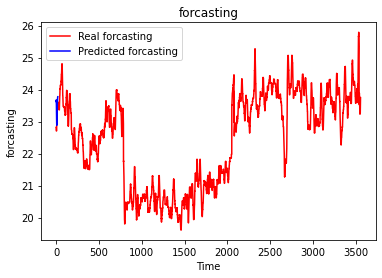

In [ ]:
plt.plot(real_aqi, color = 'red', label = 'Real forcasting')
plt.plot(predicted_aqi, color = 'blue', label = 'Predicted forcasting')
plt.title('forcasting')
plt.xlabel('Time')
plt.ylabel('forcasting')
plt.legend()
plt.show()

In [ ]:
print(predicted_aqi)

[[23.627384]
 [23.678034]
 [23.632084]
 [23.487177]
 [23.286127]
 [23.086615]
 [22.943714]
 [22.884018]
 [22.912289]
 [23.006775]
 [23.139383]
 [23.276678]
 [23.39794 ]
 [23.49858 ]
 [23.584763]
 [23.656609]
 [23.708445]
 [23.74405 ]
 [23.766499]
 [23.777025]]
